<a href="https://colab.research.google.com/github/isbennett/MLRModel/blob/main/MultipleLinearRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiple Linear Regression Model Implementation


This notebook implements a Multiple Linear Regression model using two optimisation techniques: Batch Gradient Descent and Mini-Batch Gradient Descent. The goal of this analysis is to predict student performance based on various input features, such as hours studied, previous scores, and participation in extracurricular activities.

Throughout this notebook, I will explore the data preprocessing steps, model training processes, and performance evaluation metrics. Key findings, insights into hyperparameter tuning, and visualizations will be presented to illustrate the effectiveness of each gradient descent method.

Please refer to my learning journal for a more detailed analysis of the models.


##Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

##Data Loading and Preprocessing

In [40]:
url = 'https://drive.google.com/uc?id=19IybFgOls0JvahP_LaQ39wlq43PC4o_X'
df = pd.read_csv(url)
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0}) # Encode categorical feature

## Define Features and Target Variable

In [41]:
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']].values
y = df['Performance Index'].values

## Train-test Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit on training data and transform
X_test = scaler.transform(X_test)       # Transform test data using the same parameters

# Batch Gradient Descent Implementation

##Model Definition

---



In [48]:
class MultipleLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate # Step size for weight updates
        self.n_iterations = n_iterations   # Number of iterations for training
        self.weights = None                # Placeholder for weights
        self.bias = None                   # Placeholder for bias

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)  # Small random initialization for weights
        #self.weights = np.zeros(n_features)
        self.bias = 0 #Initialise bias to zero

        # Training loop for the specified number of iterations
        for i in range(self.n_iterations):
            # Predict target values using the current weights and bias
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients for weights and bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) #computes the gradient for each weight
            db = (1 / n_samples) * np.sum(y_predicted - y) #computes the gradient for the bias

            # Update weights and bias using gradient descent
            self.weights -= self.learning_rate * dw #update the weights based on the gradient in the opposite direction
            self.bias -= self.learning_rate * db #update the bias based on the gradient in the opposite direction

            # Optional: Print loss every 1000 iterations to monitor convergence
            if i % 100 == 0:
                mse = np.mean((y_predicted - y) ** 2)
                print(f"Iteration {i}, MSE: {mse}")

    def predict(self, X):
        # Predict target values for given input data
        return np.dot(X, self.weights) + self.bias

## Model Initialisation and Training

In [49]:
model = MultipleLinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)

Iteration 0, MSE: 3424.6398840277348
Iteration 100, MSE: 462.9463483790448
Iteration 200, MSE: 65.71261017294545
Iteration 300, MSE: 12.426646223947616
Iteration 400, MSE: 5.277693140477374
Iteration 500, MSE: 4.318430932775727
Iteration 600, MSE: 4.189694949099809
Iteration 700, MSE: 4.172415380394044
Iteration 800, MSE: 4.170095642711032
Iteration 900, MSE: 4.169784169472593


## Predictions and Model Evaluation

In [50]:
y_train_pred = model.predict(X_train) # Predict on training data
y_test_pred = model.predict(X_test)   # Predict on testing data

train_mse = np.mean((y_train_pred - y_train) ** 2)
test_mse = np.mean((y_test_pred - y_test) ** 2)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 4.16974234008943
Test MSE: 4.0824578172389545
Training R2 Score: 0.9886898614630272
Testing R2 Score: 0.9889837512598888


## Training and Test Set Visualisation

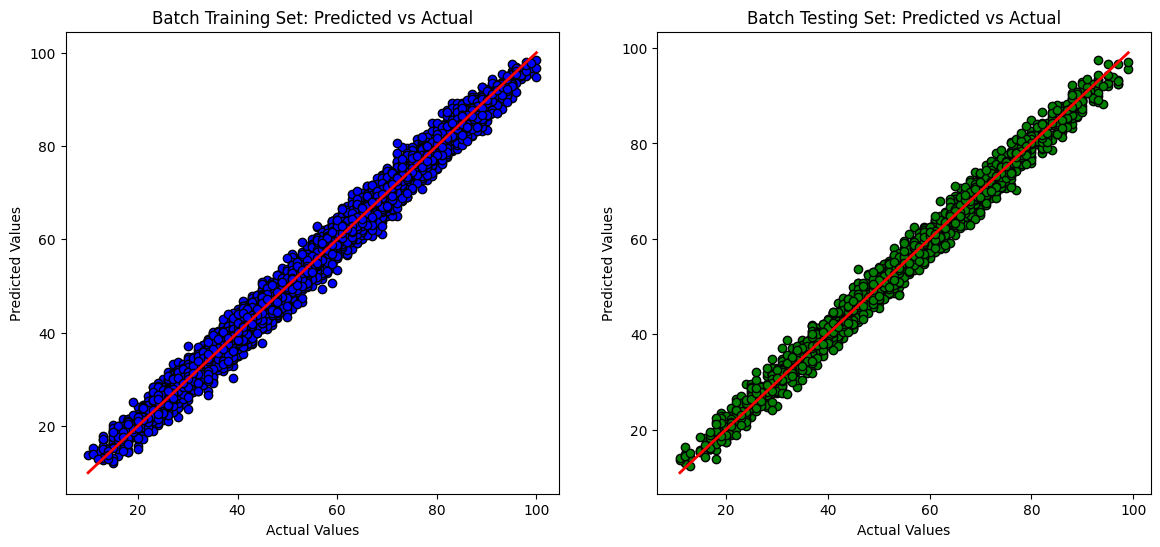

In [51]:
plt.figure(figsize=(14, 6))

# Training Set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color="blue", edgecolor="k")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Batch Training Set: Predicted vs Actual")

# Testing Set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color="green", edgecolor="k")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Batch Testing Set: Predicted vs Actual")
plt.show()

##Residual Analysis
Residual plots indicated a random distribution around zero, confirming that the assumptions of linear regression (linearity and homoscedasticity) were met. This suggests that the model is appropriate for the data without systematic errors in predictions.

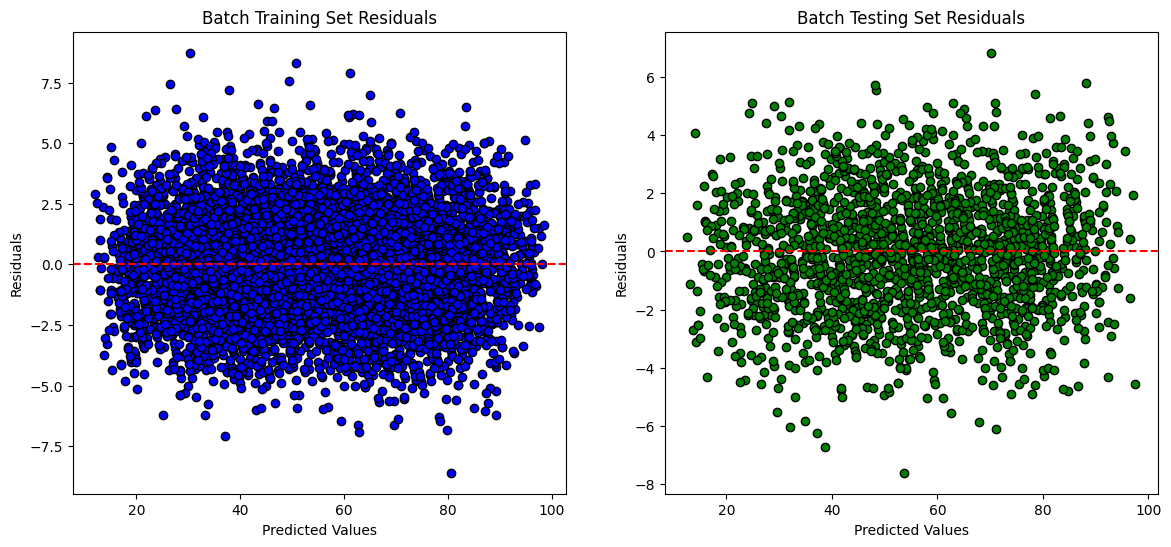

In [34]:
# Residual Plot
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize=(14, 6))

# Training Residuals
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, color="blue", edgecolor="k")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Batch Training Set Residuals")

# Testing Residuals
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, color="green", edgecolor="k")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Batch Testing Set Residuals")

plt.show()

# Mini Batch Implementation


### Model Definition

In [11]:
class MultipleLinearRegressionMiniBatch:
    def __init__(self, learning_rate=0.01, n_iterations=100, batch_size=64):
        self.learning_rate = learning_rate  # Step size for weight updates
        self.n_iterations = n_iterations    # Number of iterations for training
        self.batch_size = batch_size        # Size of mini-batches for updates
        self.weights =                      # Placeholder for weights
        self.bias = None                    # Placeholder for bias

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = 0

        # Training loop for the specified number of iterations
        for i in range(self.n_iterations):
            # Shuffle the dataset to reduce bias during mini-batch selection
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Mini-batch gradient descent loop
            for start in range(0, n_samples, self.batch_size):
                end = start + self.batch_size
                X_batch = X_shuffled[start:end] # Select mini-batch
                y_batch = y_shuffled[start:end] # Select corresponding targets

                # Predict target values using the current weights and bias
                y_predicted = np.dot(X_batch, self.weights) + self.bias

                # Calculate gradients for weights and bias
                dw = (1 / X_batch.shape[0]) * np.dot(X_batch.T, (y_predicted - y_batch))
                db = (1 / X_batch.shape[0]) * np.sum(y_predicted - y_batch)

                # Update weights and bias using gradient descent
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            # Optional: Print the mean squared error (MSE) every 10 iterations
            if i % 10 == 0:
                mse = np.mean((y_predicted - y_batch) ** 2)
                print(f"Iteration {i}, MSE: {mse}")

    def predict(self, X):
        # Predict target values for given input data.
        return np.dot(X, self.weights) + self.bias

## Model Initilisation and Training
The choice of learning rate significantly impacted convergence speed. A learning rate of **0.01** was optimal, balancing between fast convergence and stability. Larger learning rates caused instability, while smaller rates slowed convergence.\
The **batch size** of **64** for Mini-Batch Gradient Descent allowed for more frequent updates and improved computational efficiency without sacrificing model accuracy.

In [29]:
model2 = MultipleLinearRegressionMiniBatch(learning_rate=0.01, n_iterations=100, batch_size=64)
model2.fit(X_train, y_train)

Iteration 0, MSE: 258.1970112100289
Iteration 10, MSE: 3.9235175405788865
Iteration 20, MSE: 4.005088692768595
Iteration 30, MSE: 3.655337516622957
Iteration 40, MSE: 4.659193427446326
Iteration 50, MSE: 4.056786288789105
Iteration 60, MSE: 3.1546524322526177
Iteration 70, MSE: 4.755988125946386
Iteration 80, MSE: 4.158038214844346
Iteration 90, MSE: 3.5433288970607624


## Predictions and Model Evaluation
These metrics indicate that the Mini-Batch method performed well and simillarly to the Batch method, with high R2 scores suggesting a strong fit of the model to the data.

In [18]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

train_mse = np.mean((y_train_pred - y_train) ** 2)
test_mse = np.mean((y_test_pred - y_test) ** 2)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 4.170106523710991
Test MSE: 4.085638158391673
Training R2 Score: 0.9886888736400691
Testing R2 Score: 0.9889751693147015


## Training and Test Set Visualisation

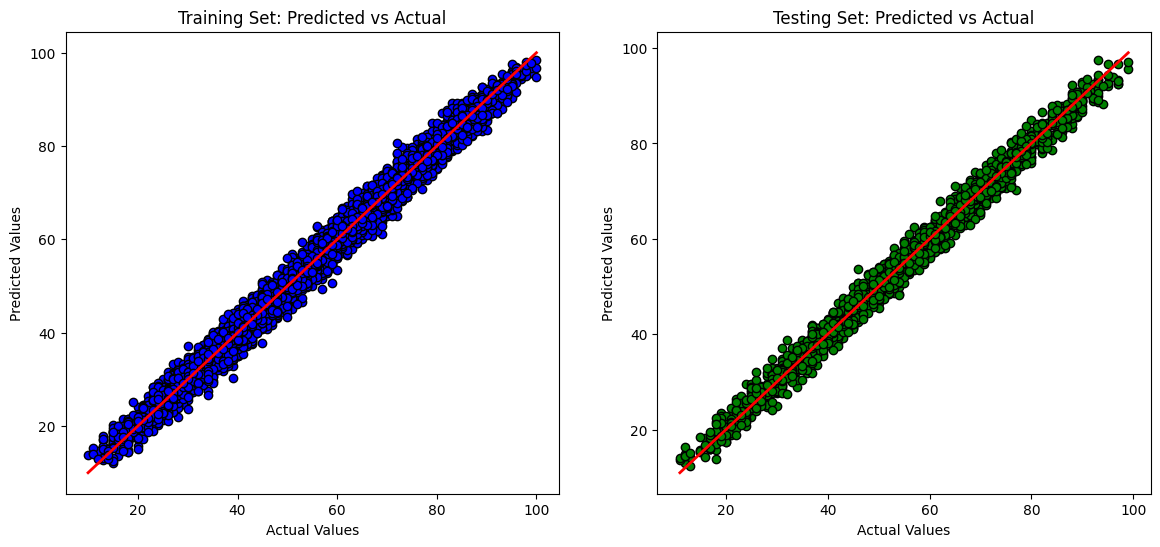

In [30]:
plt.figure(figsize=(14, 6))

# Training Set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color="blue", edgecolor="k")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Mini-Batch Training Set: Predicted vs Actual")

# Testing Set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color="green", edgecolor="k")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Mini-Batch Testing Set: Predicted vs Actual")
plt.show()

## Residual Analysis
Residual plots indicated a random distribution around zero, confirming that the assumptions of linear regression (linearity and homoscedasticity) were met. This suggests that the model is appropriate for the data without systematic errors in predictions.

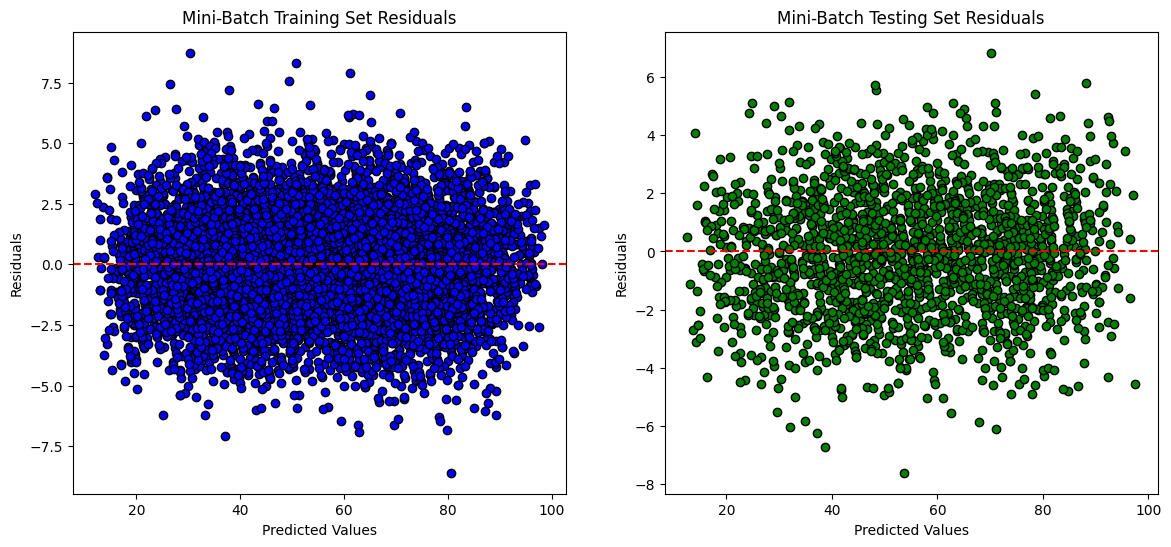

In [32]:
# Residual Plot
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize=(14, 6))

# Training Residuals
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, color="blue", edgecolor="k")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Mini-Batch Training Set Residuals")

# Testing Residuals
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, color="green", edgecolor="k")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Mini-Batch Testing Set Residuals")

plt.show()